# Grids

Grids are general types of plots that allow you to map plot types to rows and columns of a grid, this helps you create similar plots separated by features.

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
iris = sns.load_dataset('iris')

In [3]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


## PairGrid

Pairgrid is a subplot grid for plotting pairwise relationships in a dataset.

&lt;seaborn.axisgrid.PairGrid at 0x1d856220&gt;

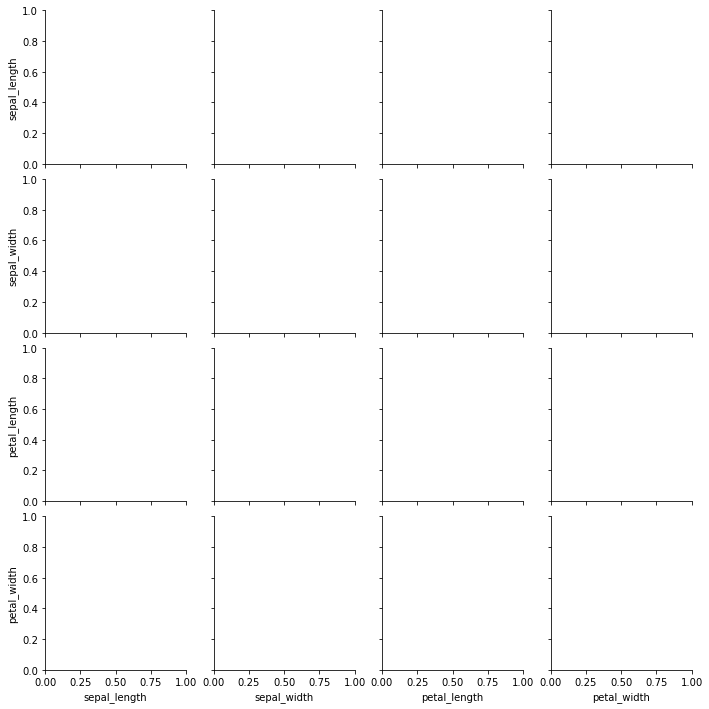

In [4]:
# Just the grid
sns.PairGrid(iris)

&lt;seaborn.axisgrid.PairGrid at 0x1fadb9a0&gt;

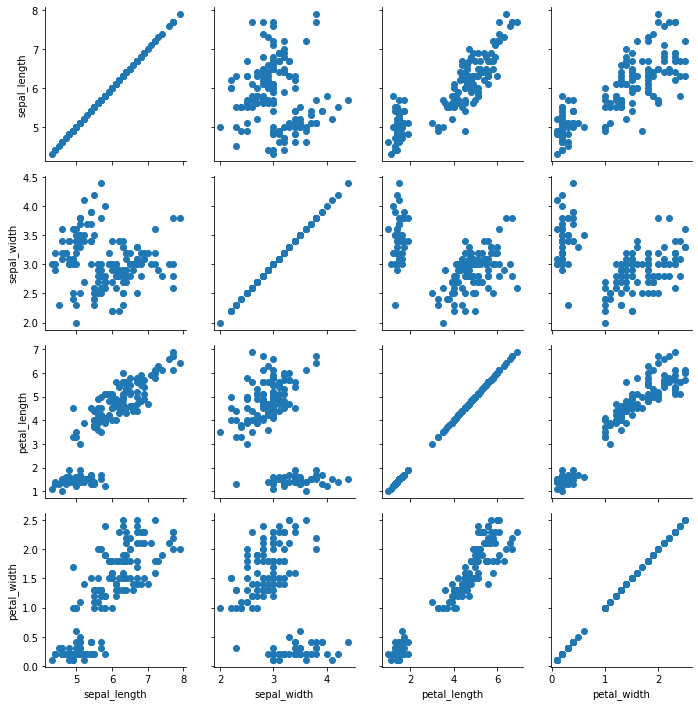

In [5]:
# Map the grid
g = sns.PairGrid(iris)
g.map(plt.scatter)

&lt;seaborn.axisgrid.PairGrid at 0x206fc808&gt;

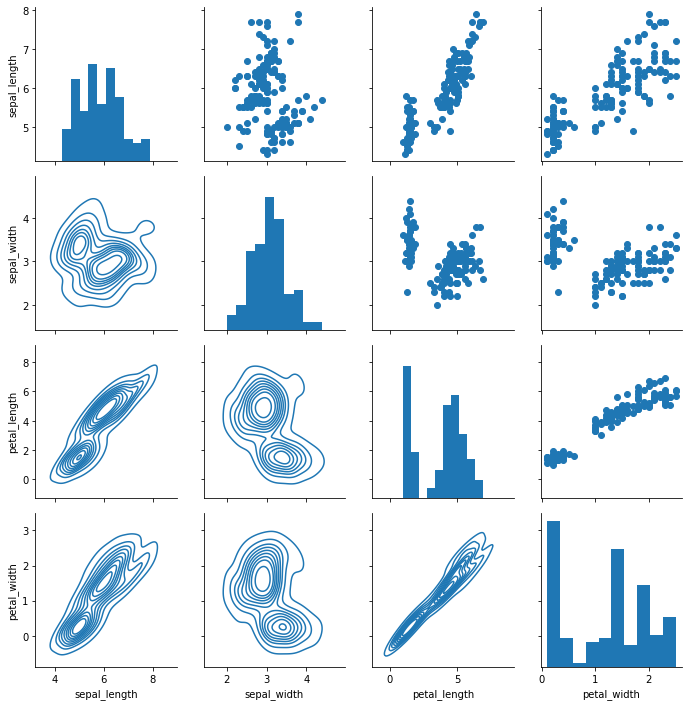

In [6]:
# Map to upper, lower, and diagonal
g = sns.PairGrid(iris)
g.map_diag(plt.hist)
g.map_upper(plt.scatter)
g.map_lower(sns.kdeplot)

## pairplot

pairplot is a simpler version of PairGrid (you'll use quite often)

&lt;seaborn.axisgrid.PairGrid at 0x22c2e040&gt;

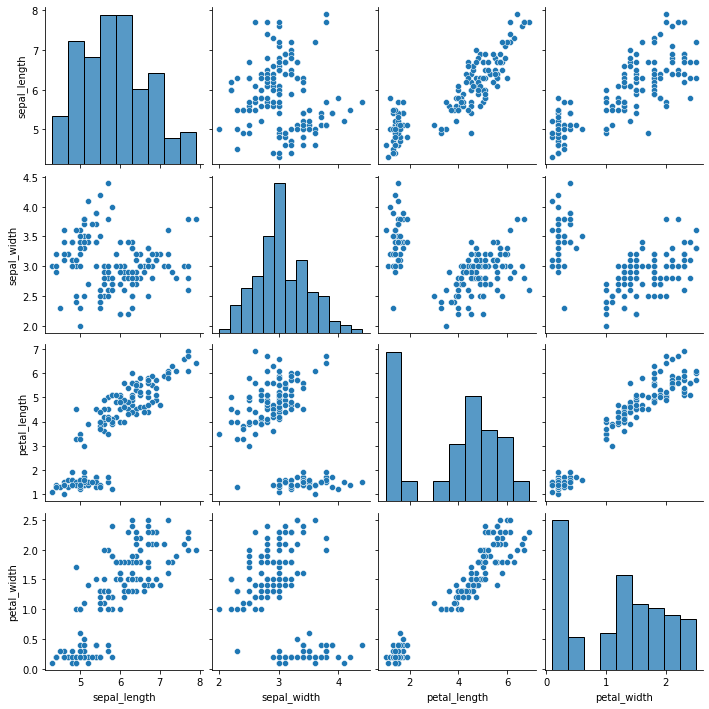

In [7]:
sns.pairplot(iris)

&lt;seaborn.axisgrid.PairGrid at 0x1fdde7f0&gt;

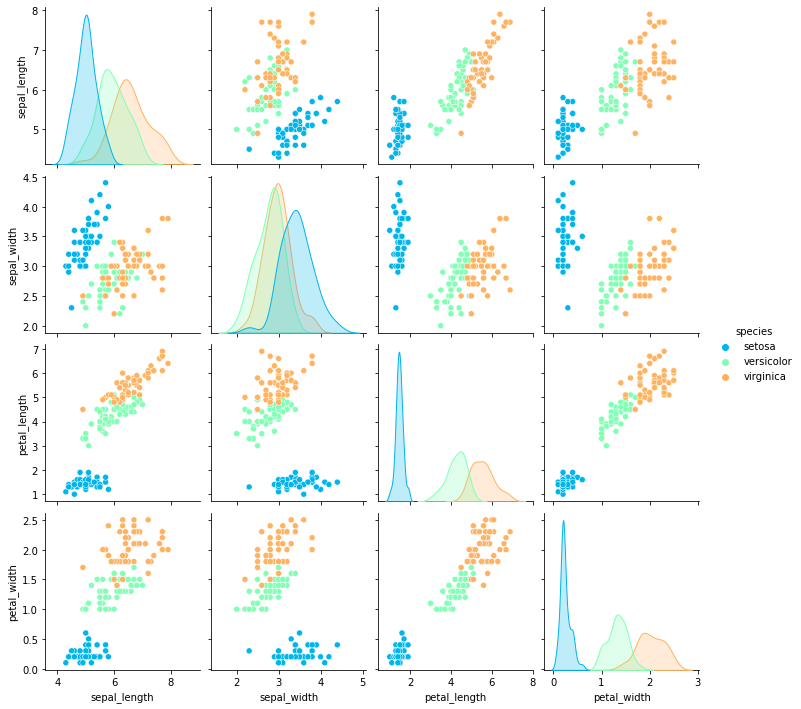

In [10]:
sns.pairplot(iris, hue='species', palette='rainbow')

## Facet Grid

FacetGrid is the general way to create grids of plots based off of a feature:

In [11]:
tips = sns.load_dataset('tips')

In [12]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


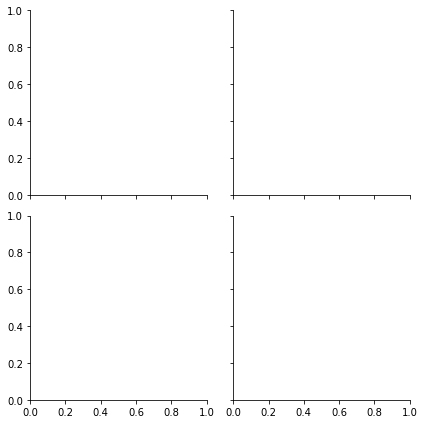

In [13]:
# Just the  Grid
g = sns.FacetGrid(tips, col='time', row='smoker')

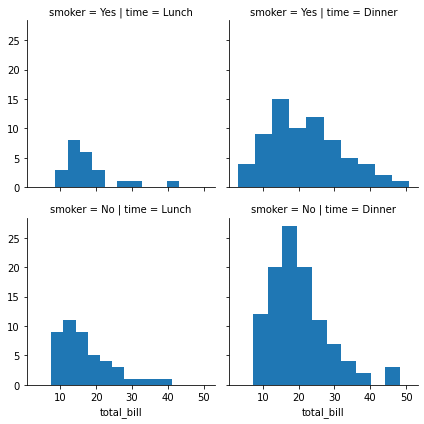

In [14]:
g = sns.FacetGrid(tips, col='time', row='smoker')
g = g.map(plt.hist, 'total_bill')

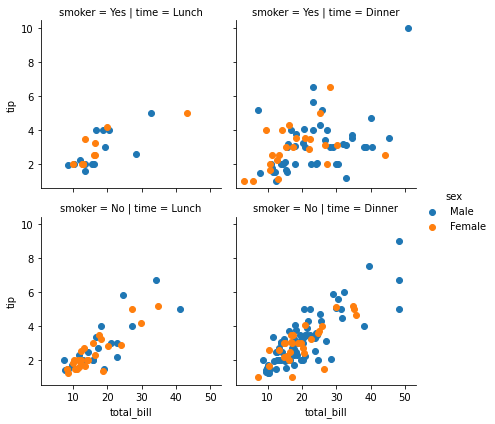

In [15]:
g = sns.FacetGrid(tips, col='time', row='smoker', hue='sex')
# Notice how the arguments come after plt.scatter call
g = g.map(plt.scatter, 'total_bill', 'tip').add_legend()

## JointGrid

JointGrid is the general version for jointplot() type grids, for a quick example:

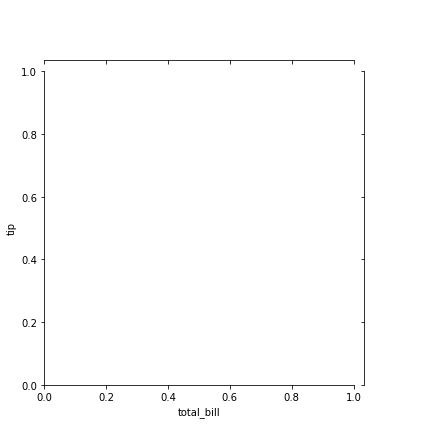

In [16]:
g = sns.JointGrid(x='total_bill', y='tip', data=tips)

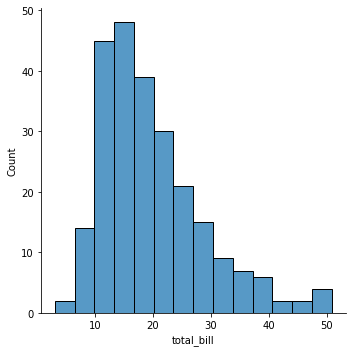

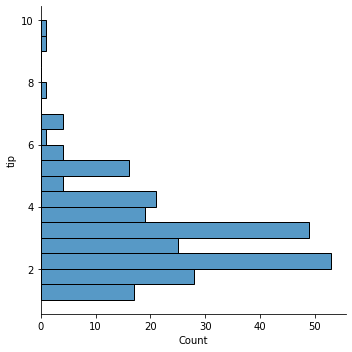

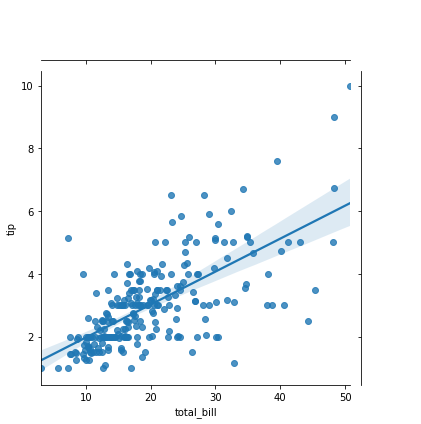

In [23]:
g = sns.JointGrid(x="total_bill", y="tip", data=tips)
g = g.plot(sns.regplot, sns.displot)

# Regression Plots

Seaborn has many built-in capabilities for regression plots, however we won't really discuss regression until the machine learning section of the course, so we will only cover the **lmplot()** function for now.

**lmplot** allows you to display linear models, but it also conveniently allows you to split up those plots based off of features, as well as coloring the hue based off of features.

Let's explore how this works:

In [24]:
import seaborn as sns
%matplotlib inline

In [25]:
tips = sns.load_dataset('tips')

In [26]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


## lmplot()

&lt;seaborn.axisgrid.FacetGrid at 0x29227070&gt;

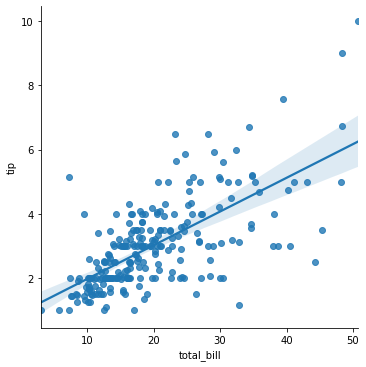

In [27]:
sns.lmplot(x='total_bill', y='tip', data=tips)

&lt;seaborn.axisgrid.FacetGrid at 0x292d8b50&gt;

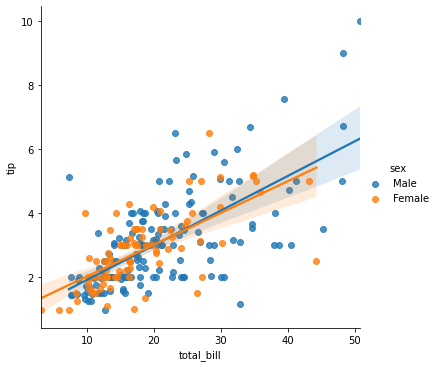

In [28]:
sns.lmplot(x='total_bill', y='tip', data=tips, hue='sex')

&lt;seaborn.axisgrid.FacetGrid at 0x29418fe8&gt;

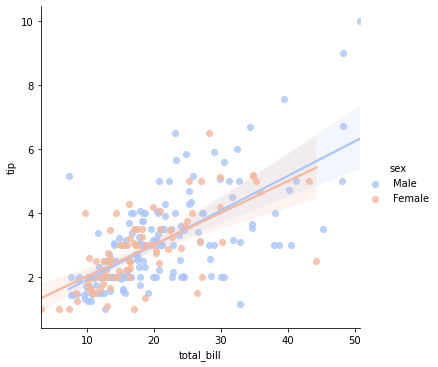

In [29]:
sns.lmplot(x='total_bill', y='tip', data=tips, hue='sex', palette='coolwarm')

### Working with Markers

lmplot kwargs get passed through to **regplot** which is a more general form of lmplot(). regplot has a scatter_kws parameter that gets passed to plt.scatter. So you want to set the s parameter in that dictionary, which corresponds (a bit confusingly) to the squared markersize. In other words you end up passing a dictionary with the base matplotlib arguments, in this case, s for size of a scatter plot. In general, you probably won't remember this off the top of your head, but instead reference the documentation.

&lt;seaborn.axisgrid.FacetGrid at 0x29170808&gt;

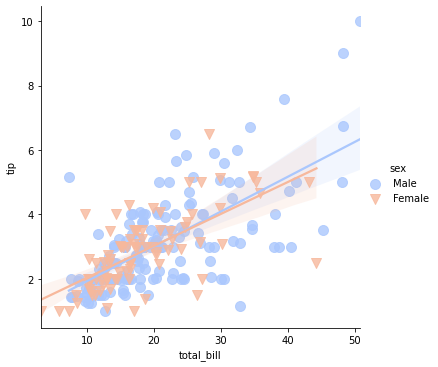

In [30]:
# http://matplotlib.org/api/markers_api.html
sns.lmplot(x='total_bill', y='tip', data=tips, hue='sex', palette='coolwarm',
           markers=['o','v'], scatter_kws={'s': 100})

## Using a Grid

We can add more variable separation through columns and rows with the use of a grid. Just indicate this with the col or row arguments:

&lt;seaborn.axisgrid.FacetGrid at 0x2964d238&gt;

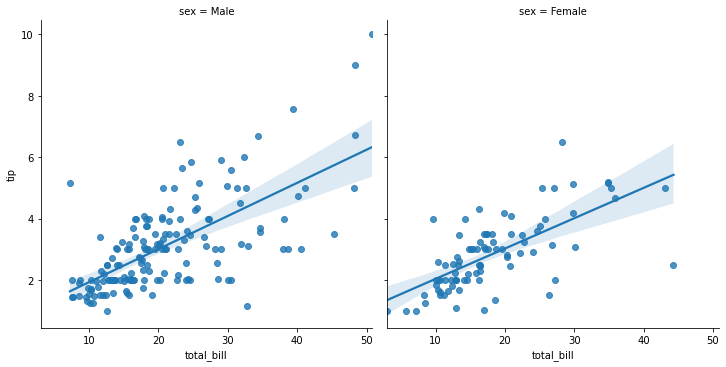

In [31]:
sns.lmplot(x='total_bill', y='tip', data=tips, col='sex')

&lt;seaborn.axisgrid.FacetGrid at 0x29acafb8&gt;

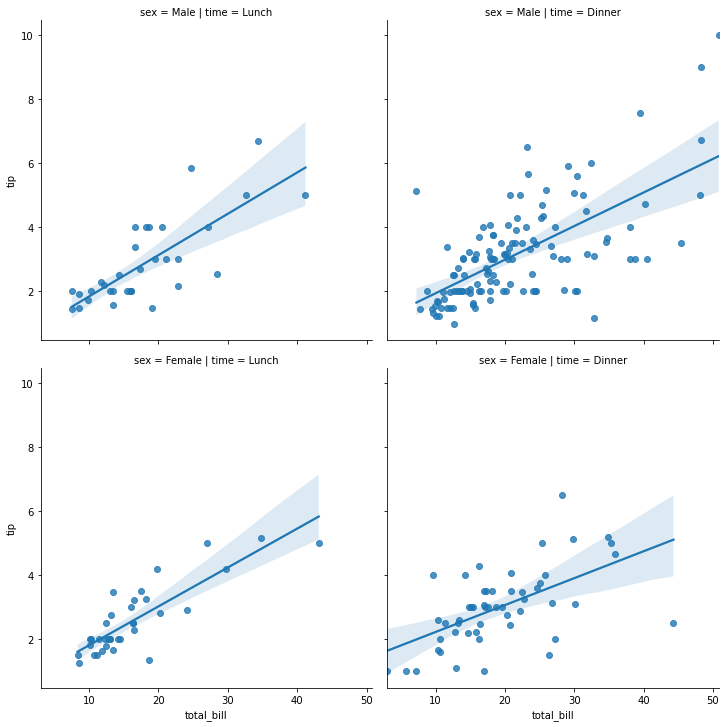

In [32]:
sns.lmplot(x='total_bill', y='tip', row='sex', col='time', data=tips)

&lt;seaborn.axisgrid.FacetGrid at 0x29ff7c70&gt;

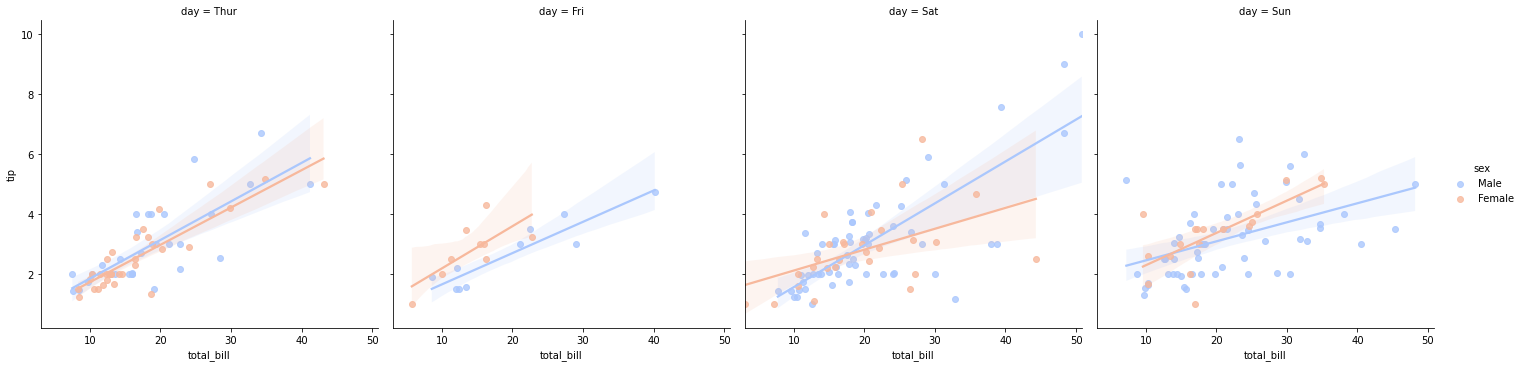

In [33]:
sns.lmplot(x='total_bill', y='tip', data=tips, col='day', hue='sex', palette='coolwarm')

## Aspect and Size

Seaborn figures can have their size and aspect ratio adjusted with the **size** and **aspect** parameters:

&lt;seaborn.axisgrid.FacetGrid at 0x2a347160&gt;

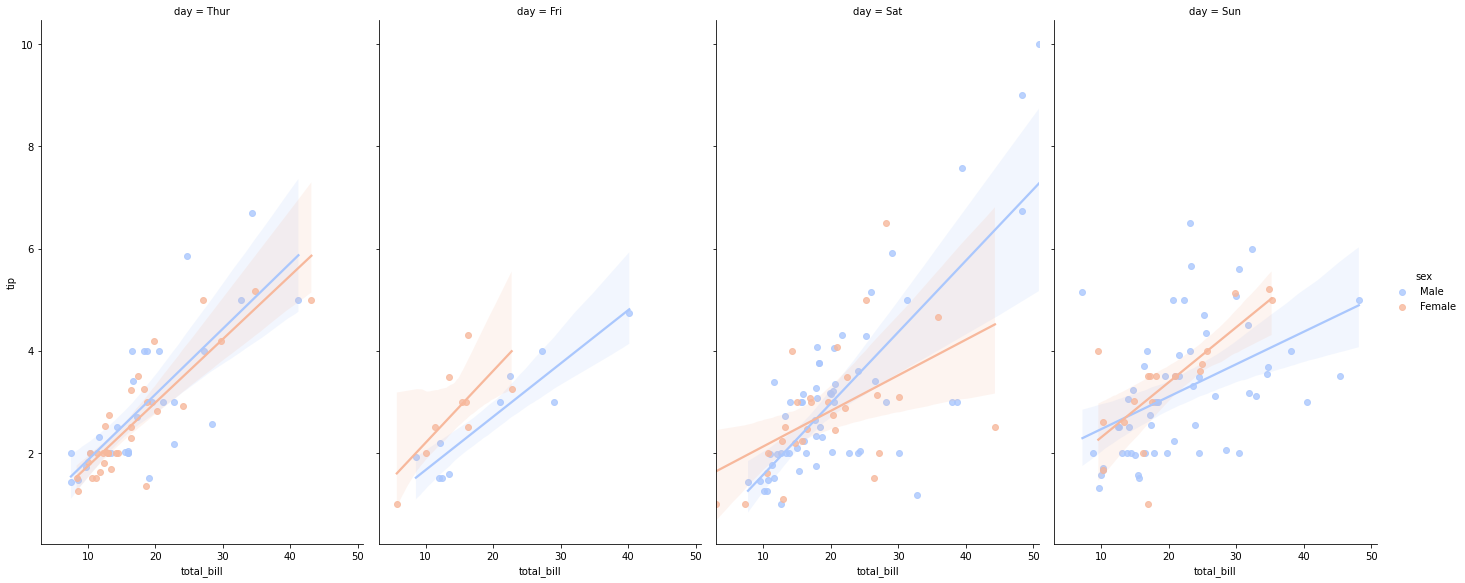

In [34]:
sns.lmplot(x='total_bill', y='tip', data=tips, col='day', hue='sex', palette='coolwarm', aspect=0.6, size=8)